# Study Summary

1. Seaborn簡介
   參考網址:https://www.cnblogs.com/slyu/p/15234272.html
   seaborn同matplotlib一樣，也是Python進行資料視覺化分析的重要協力廠商包。但seaborn是在 matplotlib的基礎上進行了更高級的API封裝，使得作圖更加容易，圖形更加漂亮。
   seaborn並不能替代matplotlib。雖然seaborn可以滿足大部分情況下的資料分析需求，但是針對一些特殊情況，還是需要用到matplotlib的。換句話說，matplotlib更加靈活，可定制化，而seaborn像是更高級的封裝，使用方便快捷。
   應該把seaborn視為matplotlib的補充，而不是替代物。
   
2. Seaborn風格
3. Seaborn dataset sns.get_dataset_names()
4. 使用relplot
   參考網址: https://www.twblogs.net/a/5c7fa564bd9eee35cd693251

2. Seaborn風格
   參考網址:https://www.cnblogs.com/slyu/p/15234272.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

有五種seaborn的風格，分別是：darkgrid, whitegrid, dark, white, ticks。預設的主題是darkgrid。
sns.set_style("whitegrid")
sns.despine() #移除軸脊柱

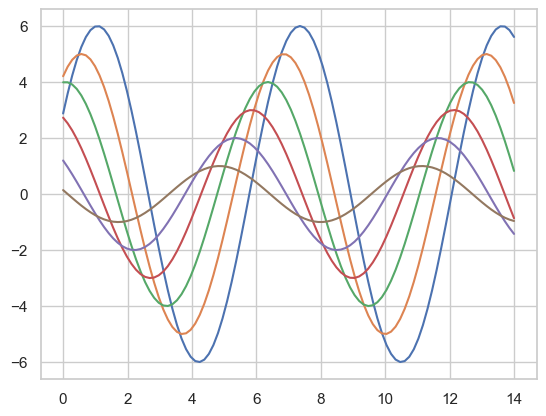

In [20]:
#定義一個簡單的函數來繪製一些sin正弦波，用來測試
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set_style("whitegrid")
sinplot()

#flip = 1, 0 ,-1，分別是水平、垂直、水平垂直翻轉

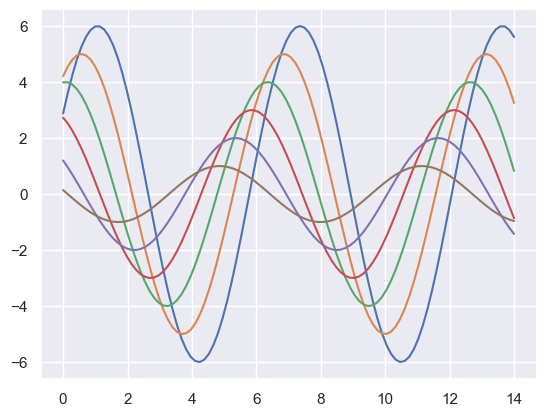

In [16]:
#轉換為seaborn默認繪圖，可以簡單的用set()方法。

import seaborn as sns

sns.set()
sinplot()

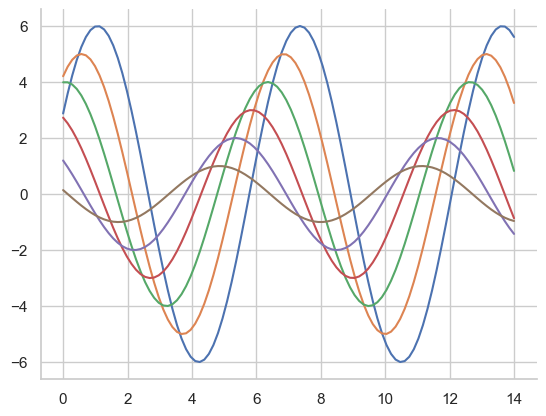

In [21]:
#移除軸脊柱
#使用matplotlib是無法實現這一需求的，但是使用seaborn的despine()方法可以實現

sinplot()
sns.despine()

Seaborn 將 matplotlib 的參數劃分為兩個獨立的組合。第一組是設置繪圖的外觀風格的，第二組主要將繪圖的各種元素按比例縮放的，以至可以嵌入到不同的背景環境中。
操控這些參數的介面主要有兩對方法：
1. 控制風格：axes_style(), set_style()。例如:sns.set_style("whitegrid")
2. 縮放繪圖：plotting_context(), set_context()

每對方法中的第一個方法（axes_style(), plotting_context()）會返回一組字典參數，
而第二個方法（set_style(), set_context()）會設置matplotlib的默認參數。

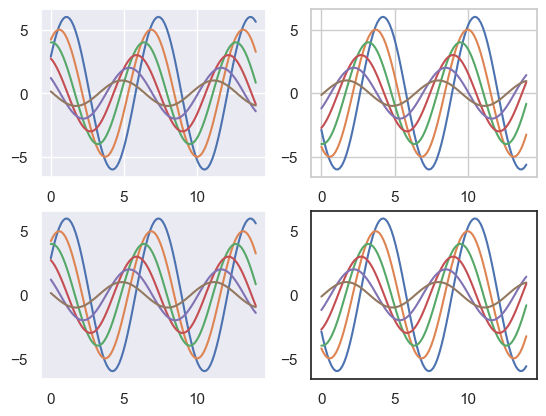

In [32]:
with sns.axes_style("darkgrid"):
    plt.subplot(221)
    sinplot()
with sns.axes_style("whitegrid"):
    plt.subplot(222)
    sinplot(-1)
with sns.axes_style("dark"):
    plt.subplot(223)
    sinplot()
with sns.axes_style("white"):
    plt.subplot(224)
    sinplot(-1)

3. Seaborn dataset

In [41]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

4. 使用relplot
   參考網址: https://www.twblogs.net/a/5c7fa564bd9eee35cd693251

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


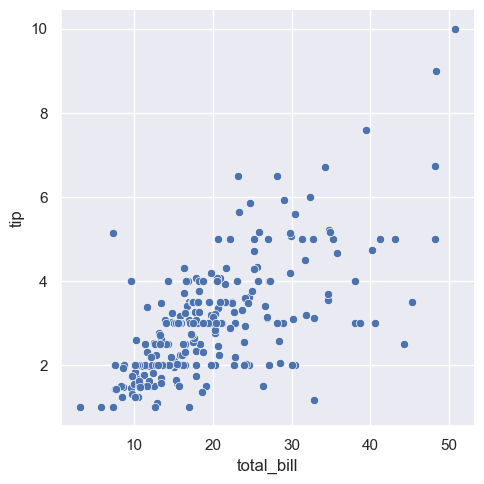

In [44]:
import seaborn as sns

sns.set(style = "darkgrid")

tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")

print(tips.head())
print(fmri.head())

#套用x/y的變數
#relplot, relationship plot, 關聯式繪圖，初始設定使用點圖
sns.relplot(x = "total_bill", y = "tip", data = tips)

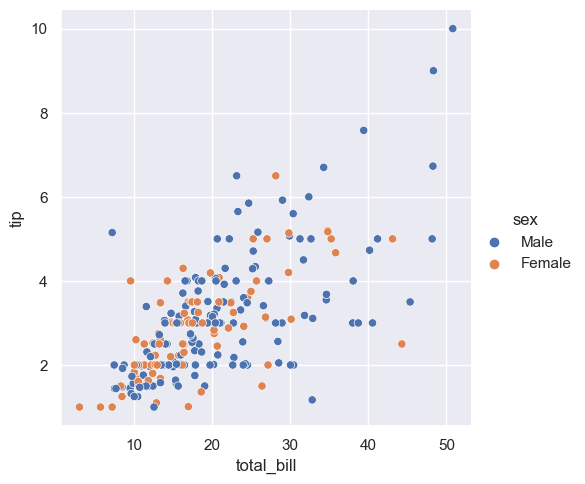

In [48]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips)
#hue: 在某一維度上，用顏色區分

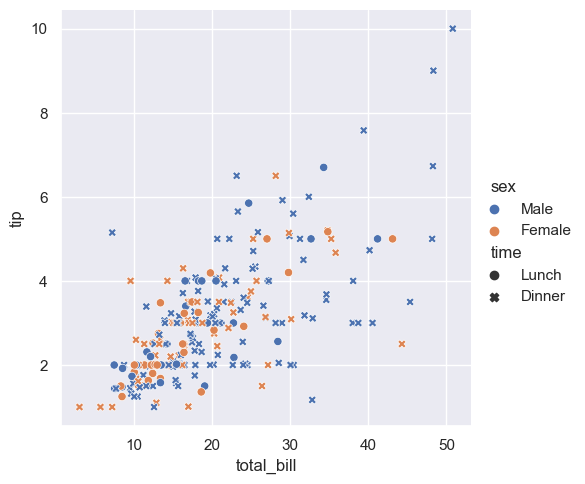

In [50]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", style = "time", data = tips)
#style: 在某一維度上, 用線的不同表現形式區分, 如 點線, 虛線等

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

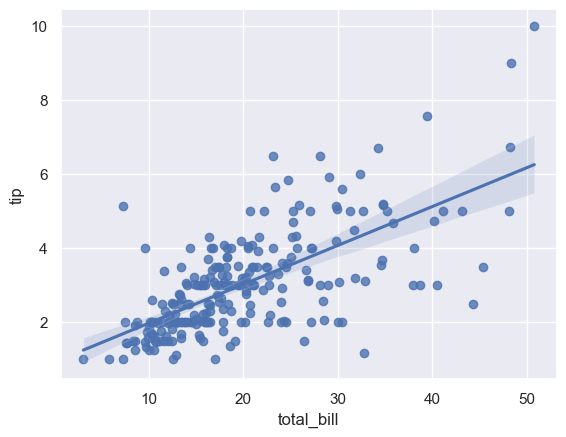

In [66]:
#關聯式繪圖中，使用迴歸
#regplot, regression plot, 參數的定義與relplot相同
sns.regplot(x = "total_bill", y = "tip", data = tips)
#x,y的dataset必須是number

# Homework

1. 繪製模型殘差圖，進一步了解不同的特徵值所呈現的關係圖
   顯示的四個變數中, 把hue 套用 sex
   x="total_bill", y="tip", hue="sex", style="time"
   
2. 使用新的數據集fmri, 再跑一次

1. 使用relplot
   x="total_bill", y="tip", hue="sex", style="time"

In [ ]:
import seaborn as sns

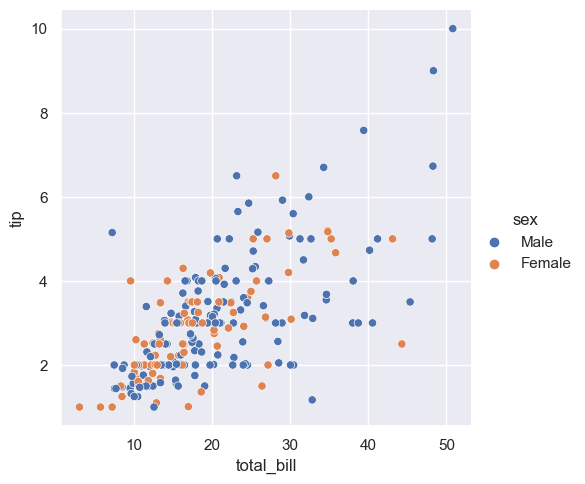

In [56]:
tips = sns.load_dataset("tips")
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips)

2. 使用新的數據集fmri, 再跑一次

In [59]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


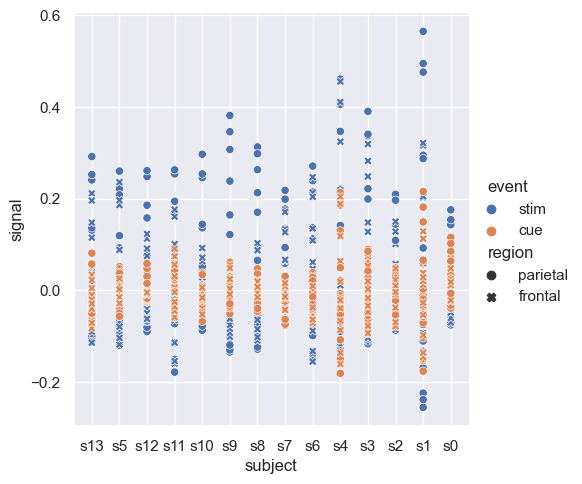

In [63]:
sns.relplot(x = "subject", y = "signal", hue = "event", style = "region", data = fmri)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

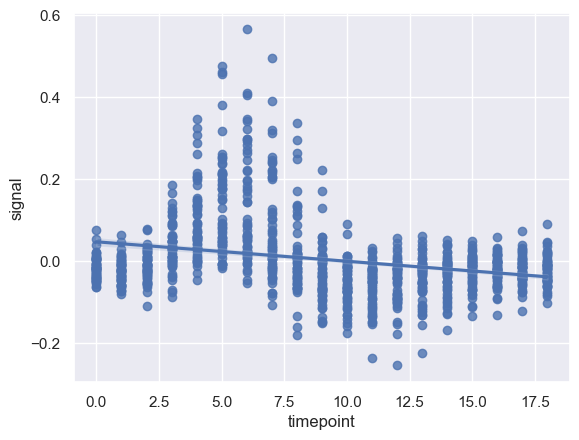

In [65]:
#使用迴歸
sns.regplot(x = "timepoint", y = "signal", data = fmri)